# Poolman 2000 model

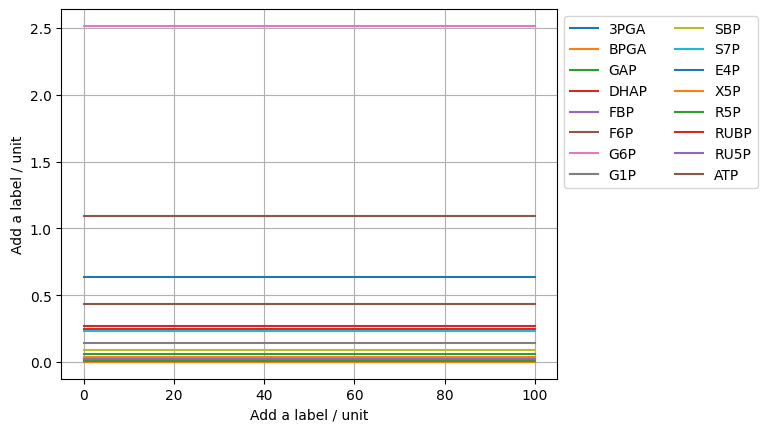

In [1]:
import numpy as np
import pandas as pd

from mxlbricks import get_poolman2000 as get_model
from mxlbricks import names as n
from mxlpy import Simulator, plot, unwrap
from mxlpy.integrators.int_assimulo import Assimulo

EPS = 1e-6

model = get_model()
res = unwrap(
    Simulator(model, integrator=Assimulo)
    .simulate(100)
    # .simulate(5)
    .get_result()
)

fig, ax = plot.lines(res.get_variables(include_derived=False, include_readouts=False))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), ncols=2)

if (
    diff := np.linalg.norm(
        pd.Series(model.variables) - pd.Series(res.get_new_y0()), ord=2
    )
) > EPS:
    msg = f"Diff between models too large: {diff}"
    raise ValueError(msg)

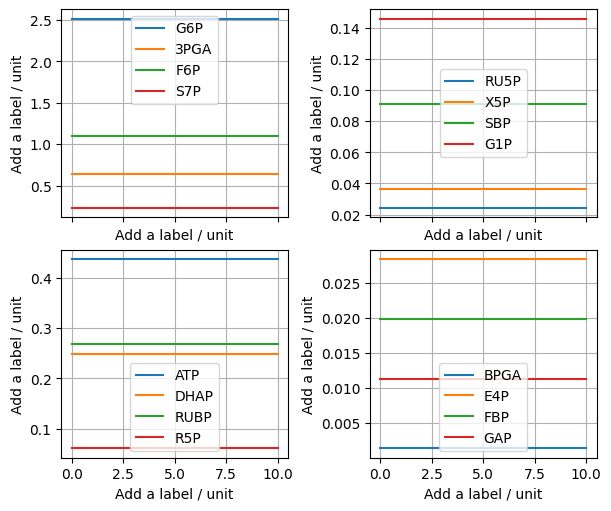

In [2]:
res = unwrap(Simulator(get_model()).simulate(10).get_result())
c, v = res

groups = [
    c.loc[:, [n.g6p(), n.pga(), n.f6p(), n.s7p()]],
    c.loc[:, [n.ru5p(), n.x5p(), n.sbp(), n.g1p()]],
    c.loc[:, [n.atp(), n.dhap(), n.rubp(), n.r5p()]],
    c.loc[:, [n.bpga(), n.e4p(), n.fbp(), n.gap()]],
]

_ = plot.lines_grouped(
    groups,
    n_cols=2,
    sharex=True,
    sharey=False,
    row_height=2.5,
)